# 🤖 Use Pre-trained CNN Models to Identify MPox

Here, we are going to use a few pre-trained CNN models to identify MPox from other dermatological diseases. The dataset we are using has the following sets of images.

- Actinic keratoses
- Basal cell carcinoma
- Benign keratosis-like lesions
- Chickenpox
- Cowpox
- Dermatofibroma
- Healthy
- HFMD
- Measles
- Melanocytic nevi
- Melanoma
- Monkeypox
- Squamous cell carcinoma
- Vascular lesions

We are going to use the following pre-trained CNN models to identify MPox.

- ***ResNet50V2***
  - ResNet50V2 is an improved version of the ResNet50 deep convolutional neural network architecture, designed with batch normalization before activation functions and identity mapping to enhance training stability and performance for image recognition tasks.<br><br>
- ***InceptionResNetV2***
  - The InceptionResNetV2 model is a deep convolutional neural network that combines the Inception architecture’s efficiency in feature extraction with the ResNet framework’s skip connections, enabling faster training and improved performance for image recognition tasks.<br><br>
- ***Xception***
  - The Xception model is a deep convolutional neural network architecture that improves performance by using depthwise separable convolutions, optimizing both accuracy and computational efficiency and is an extension of the Inception architecture.<br><br>
- ***VGG16***
  - VGG16 is a deep convolutional neural network architecture with 16 layers, known for its simplicity and uniform structure, using small 3x3 convolutional filters for feature extraction and achieving strong performance in image recognition tasks.<br><br>
- ***VGG19***
  - VGG19 is a deep convolutional neural network architecture with 19 layers, similar to VGG16, but with additional convolutional layers, designed to extract detailed features using small 3x3 filters for image recognition tasks.<br><br>
- ***MobileNetV2***
  - MobileNetV2 is a lightweight convolutional neural network architecture optimized for mobile and embedded devices, featuring depthwise separable convolutions and an innovative inverted residual structure with linear bottlenecks for efficient feature extraction.

## 🗂️ Import Libraries

The following code block imports all the libraries that are necessary for our development purposes.

#### 🔢 `numpy`
- NumPy is a powerful Python library used for numerical computing, providing support for large, multi-dimensional arrays, matrices, and high-level mathematical functions to operate on them efficiently.

#### 🐼 `pandas`
- Pandas is a Python library designed for data manipulation and analysis, offering easy-to-use data structures like DataFrames and Series for handling structured data efficiently.

#### 👣 `pathlib`
- Pathlib is a Python library that provides an object-oriented interface for working with filesystem paths, making path manipulation and file operations more intuitive and cross-platform.

#### 📈 `matplotlib`
- Matplotlib is a Python library for creating static, interactive, and animated visualizations in a variety of formats, including plots, graphs, and charts.

#### ⚡ `tensorflow`
- TensorFlow is an open-source library designed for building and deploying machine learning and deep learning models, offering a flexible ecosystem for numerical computation and AI development.

#### 🧠 `keras`
- Keras is a high-level deep learning library in Python that simplifies the creation and training of neural networks by providing an intuitive interface to underlying frameworks like TensorFlow.

#### 🌊 `seaborn`
- Seaborn is a Python library built on Matplotlib that simplifies creating aesthetically pleasing and informative statistical graphics for data visualization.

#### 💻 `os`
- The os library in Python provides a way to interact with the operating system, enabling tasks such as file and directory manipulation, environment variable access, and process management.

#### 🔬 `scikit-learn`
- Scikit-learn is a Python library that provides simple and efficient tools for data mining, data analysis, and machine learning, including classification, regression, and clustering algorithms.

#### 📄 `shutil`
- The shutil library in Python provides a suite of functions for high-level file operations, including copying, moving, renaming, and deleting files and directories.

### 🎲 `random`
- The random library in Python provides functions to generate random numbers, select random elements, and perform random operations like shuffling and sampling, useful for simulations, games, and probabilistic programming.

### ⚠️ `warnings`
- The warnings library in Python is used to issue, control, and filter warning messages during runtime, helping developers identify and address potential issues in their code without interrupting program execution.

In [1]:
# 🗂️ Import Libraries

import numpy as np
import pandas as pd
from pathlib import Path
import os
import random
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm
from keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from keras_tuner import Hyperband
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, VGG19, MobileNetV2, ResNet50V2, InceptionResNetV2, Xception
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import shutil

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## ♾️ Constants

While proceeding with the process, we need some constants that may refer to the directory paths, image category names, data generation properties, etc.

In [2]:
# ♾️ Constants

# Directory Paths
DATA_PATH = './data/original'
AUGMENTED_PATH = './data/cnn_augmented'
CNN_BALANCED_PATH = './data/cnn_balanced'
MODELS_PATH = './models/cnn'

TRAIN_DIRECTORY = 'train'
TEST_DIRECTORY = 'test'
VALIDATION_DIRECTORY = 'val'

# Sample Values
TRAIN_DATASET_SAMPLE_COUNT = 1000
TEST_DATASET_SAMPLE_COUNT= 200
VALIDATION_DATASET_SAMPLE_COUNT = 200

# Directories containing the images
SUB_DIRECTORIES = [TRAIN_DIRECTORY, TEST_DIRECTORY, VALIDATION_DIRECTORY]
DATA_DIRECTORIES = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Dermatofibroma', 'Healthy', 'HFMD', 'Measles', 'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma', 'Vascular lesions']

# Data generation properties
ROTATION_RANGE = 40
WIDTH_SHIFT_RANGE = 0.2
HEIGHT_SHIFT_RANGE = 0.2
SHEAR_RANGE = 0.2
ZOOM_RANGE = 0.2
HORIZONTAL_FLIP = True
FILL_MODE = 'nearest'

# Model-related constants
# Dictionary mapping model names to their preprocessing functions
PREPROCESSING_FUNCTIONS = {
    "VGG16": tf.keras.applications.vgg16.preprocess_input,
    "VGG19": tf.keras.applications.vgg19.preprocess_input,
    "MobileNetV2": tf.keras.applications.mobilenet_v2.preprocess_input,
    "ResNet50V2": tf.keras.applications.resnet_v2.preprocess_input,
    "InceptionResNetV2": tf.keras.applications.inception_resnet_v2.preprocess_input,
    "Xception": tf.keras.applications.xception.preprocess_input
}

MODELS_TO_TEST = {
    "VGG16": VGG16,
    "VGG19": VGG19,
    "MobileNetV2": MobileNetV2, 
    "ResNet50V2": ResNet50V2, 
    "InceptionResNetV2": InceptionResNetV2,
    "Xception": Xception
}

## 🧮 Get Number of Images

Get the number of images in each directory and sub-directory to get an understanding of the dataset.

In [3]:
# 🧮 Get Number of Images

# This method is used to get the number of images in each of the directories in our dataset
def count_images(dir_name):
    for dataset_type in SUB_DIRECTORIES:
        dir_type = os.path.join(dir_name, dataset_type)
        print(f"{dataset_type}")
        print("----------------------------")
        for category in os.listdir(dir_type):
            category_path = os.path.join(dir_type, category)
            if not os.path.isdir(category_path):
                continue
            images = [img for img in os.listdir(category_path) if img.endswith(('jpg', 'jpeg'))]
            print(f"Number of images in {category_path.split('/')[-1]}: {len(images)}")
        print("")

In [4]:
# Execute the method
count_images(DATA_PATH)

train
----------------------------
Number of images in Benign keratosis-like lesions: 2099
Number of images in Cowpox: 792
Number of images in Healthy: 1368
Number of images in Actinic keratoses: 693
Number of images in Melanoma: 3617
Number of images in HFMD: 1932
Number of images in Melanocytic nevi: 10300
Number of images in Measles: 660
Number of images in Chickenpox: 900
Number of images in Basal cell carcinoma: 2658
Number of images in Squamous cell carcinoma: 502
Number of images in Monkeypox: 3408
Number of images in Dermatofibroma: 191
Number of images in Vascular lesions: 202

test
----------------------------
Number of images in Benign keratosis-like lesions: 263
Number of images in Cowpox: 99
Number of images in Healthy: 171
Number of images in Actinic keratoses: 88
Number of images in Melanoma: 453
Number of images in HFMD: 242
Number of images in Melanocytic nevi: 1288
Number of images in Measles: 83
Number of images in Chickenpox: 113
Number of images in Basal cell carci

## 🗜️ Image Augmentation for Categories with Low Image Count

Since the image count is low on the following we need to augment those images. Then, we can add the original images and a set of augmented images for our model creation.

***train*** Dataset (<1000)
- *Cowpox*
- *Actinic keratoses*
- *Measels*
- *Chickenpox*
- *Squamous cell carcinoma*
- *Dermatofibroma*
- *Vascular lesions*

***test*** Dataset (<200)
- *Cowpox*
- *Healthy*
- *Actinic keratoses*
- *Measels*
- *Chickenpox*
- *Squamous cell carcinoma*
- *Dermatofibroma*
- *Vascular lesions*

***val*** Dataset (<200)
- *Cowpox*
- *Healthy*
- *Actinic keratoses*
- *Measels*
- *Chickenpox*
- *Squamous cell carcinoma*
- *Dermatofibroma*
- *Vascular lesions*

### 💾 Define Data Generation Properties
To augment images we need to use something called `ImageDataGenerator`. To use that we need to define data-gen properties. This way more data is generated according to the parameters we define. The parameters we will be using for this are as follows.

- ↻ `rotation_range`
    - Specifies the range(in degrees) within which the image is randomly rotated.
    - For example, a value of `40` means the image can be rotated randomly by up to `40` degrees in either direction(clockwise or counterclockwise).<br><br>
    
- ↔ `width_shift_range`
    - Specifies the fraction of the total width of the image by which it can be randomly shifted horizontally.
    - For example, a value of `0.2` allows a horizontal shift of up to `20%` of the image's width.<br><br>
    
- ↕ `height_shift_range`
    - Specifies the fraction of the total height of the image by which it can be randomly shifted vertically.
    - For example, a value of `0.2` allows a vertical shift of up to `20%` of the image's height.<br><br>
  
- ➤ `shear_range`
    - Specifies the intensity of shear transformation as a shear angle in a counterclockwise direction in degrees.
    - A shear transformation distorts the image along an axis creating a parallelogram effect.<br><br>

- 🔎 `zoom_range`
   - Specifies the range for random zoom. It can zoom in or out within this range.
   - For example, a value of `0.2` means the image size can be varied randomly by up to `±20%`.<br><br>

- ― `horizontal_flip`
   - Specifies whether the image should be flipped horizontally.
   - If `True`, the image is randomly flipped along the horizontal axis, mirroring it.<br><br>

- 🚰 `fill_mode`
   - Specifies the strategy for filling in pixels that are introduced during transformations.
   - The value `nearest` means the nearest pixel values are used to fill these gaps.

In [5]:
# 🗜️ Image Augmentation for Categories with Low Image Count

# Define directories that lack the images count
TRAIN_IMAGE_AUGEMENTATION_DIRS = ['Cowpox', 'Actinic keratoses', 'Measles', 'Chickenpox', 'Squamous cell carcinoma', 'Dermatofibroma', 'Vascular lesions']
TEST_IMAGE_AUGEMENTATION_DIRS = ['Cowpox', 'Healthy', 'Actinic keratoses', 'Measles', 'Chickenpox', 'Squamous cell carcinoma', 'Dermatofibroma', 'Vascular lesions']
VAL_IMAGE_AUGEMENTATION_DIRS = ['Cowpox', 'Healthy', 'Actinic keratoses', 'Measles', 'Chickenpox', 'Squamous cell carcinoma', 'Dermatofibroma', 'Vascular lesions']

# Create Image Generator
datagen = ImageDataGenerator(
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    shear_range=SHEAR_RANGE,
    zoom_range=ZOOM_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    fill_mode=FILL_MODE)

# Function to process and augment data
def augment_and_copy_data(dir_name):
    for dataset_type in SUB_DIRECTORIES:
        dir_type = os.path.join(dir_name, dataset_type)
        # Dependeing on the dataset_type pick the categories with less number of images
        categories = []
        if dataset_type == TRAIN_DIRECTORY:
            categories = TRAIN_IMAGE_AUGEMENTATION_DIRS
        elif dataset_type == TEST_DIRECTORY:
            categories = TEST_IMAGE_AUGEMENTATION_DIRS
        else:
            categories = VAL_IMAGE_AUGEMENTATION_DIRS
        for category in categories:
            category_path = os.path.join(dir_type, category)
            # Get augmented dataset path (e.g. ./data/augmented/train)
            augmented_path = os.path.join(AUGMENTED_PATH, dataset_type)
            # Create the dataset type directory if it does not exist
            os.makedirs(augmented_path, exist_ok=True)
            # Get augmented category path (e.g. ./data/augmented/train/Cowpox)
            augmented_category_path = os.path.join(augmented_path, category)
            # Create a directory if it does not exist
            os.makedirs(augmented_category_path, exist_ok=True)

            # Get all the files inside a category directory
            files = os.listdir(category_path)

            print(f'Started augmenting images in: {category_path}')

            # Iterate files
            for file in files:
                if file.startswith('.'): ### Skip hidden files
                    continue
                # Load images
                img_path = os.path.join(category_path, file)
                img = load_img(str(img_path))
                x = img_to_array(img) # This is a NumPy array with shape (3, 150, 150)
                x = x.reshape((1,) + x.shape) # This is a NumPy array with shape (1, 3, 150, 150)
                # The .flow() command generates batches of randomly transformed images and saves the results in the ./data/augmented/<sub_directory>/<data_directory> along with the original image
                # print(f'Started augmenting image: {img_path}')
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_category_path, save_prefix=file.split(".")[0], save_format='jpg'):
                    i += 1
                    if i > 10:
                        break # Stop looping the generator infinitely

In [6]:
# Execute the method
augment_and_copy_data(DATA_PATH)

Started augmenting images in: ./data/original/train/Cowpox
Started augmenting images in: ./data/original/train/Actinic keratoses
Started augmenting images in: ./data/original/train/Measles
Started augmenting images in: ./data/original/train/Chickenpox
Started augmenting images in: ./data/original/train/Squamous cell carcinoma
Started augmenting images in: ./data/original/train/Dermatofibroma
Started augmenting images in: ./data/original/train/Vascular lesions
Started augmenting images in: ./data/original/test/Cowpox
Started augmenting images in: ./data/original/test/Healthy
Started augmenting images in: ./data/original/test/Actinic keratoses
Started augmenting images in: ./data/original/test/Measles
Started augmenting images in: ./data/original/test/Chickenpox
Started augmenting images in: ./data/original/test/Squamous cell carcinoma
Started augmenting images in: ./data/original/test/Dermatofibroma
Started augmenting images in: ./data/original/test/Vascular lesions
Started augmenting i

## ⚖️ Create a Balanced Dataset

We need to create a balanced dataset to use the CNN models more effectively. The lowest number of images in category directories of the `train` dataset is 191. Therefore, we can create a balanced dataset containing 191 images from each category directory.

To do that we can create a method named `create_balanced_dataset` with three inputs, `source_dir`, `dest_dir`, and `num_images`. 

In [7]:
# ⚖️ Create a Balanced Dataset
# This method is used to copy a certain number of images from every, train, test, and validation set.

def limit_data_from_source(source_dir, dest_dir, num_images=TRAIN_DATASET_SAMPLE_COUNT):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for dataset_type in SUB_DIRECTORIES:
        source_type_dir = os.path.join(source_dir, dataset_type)
        dest_type_dir = os.path.join(dest_dir, dataset_type)
        os.makedirs(dest_type_dir, exist_ok=True)
        for category in os.listdir(source_type_dir):
            category_path = os.path.join(source_type_dir, category)
            if not os.path.isdir(category_path):
                continue
            dest_category_path = os.path.join(dest_type_dir, category)
            os.makedirs(dest_category_path, exist_ok=True)

            images = [img for img in os.listdir(category_path) if img.endswith(('jpg', 'jpeg'))]
            print(f"Number of images in {dataset_type}/{category_path.split('/')[-1]}: {len(images)}")
            # Select the number of images provided in num_images param or the minimum number of images
            if dataset_type == TRAIN_DIRECTORY:
                num_images = TRAIN_DATASET_SAMPLE_COUNT
            elif dataset_type == TEST_DIRECTORY:
                num_images = TEST_DATASET_SAMPLE_COUNT
            else:
                num_images = VALIDATION_DATASET_SAMPLE_COUNT
            selected_images = random.sample(images, min(num_images, len(images)))

            for image in selected_images:
                source_image_path = os.path.join(category_path, image)
                dest_image_path = os.path.join(dest_category_path, image)
                # print(f'Copying {source_image_path} to {dest_image_path}')
                shutil.copy(source_image_path, dest_image_path)          

In [8]:
# Execute the method
limit_data_from_source(DATA_PATH, CNN_BALANCED_PATH)

Number of images in train/Benign keratosis-like lesions: 2099
Number of images in train/Cowpox: 792
Number of images in train/Healthy: 1368
Number of images in train/Actinic keratoses: 693
Number of images in train/Melanoma: 3617
Number of images in train/HFMD: 1932
Number of images in train/Melanocytic nevi: 10300
Number of images in train/Measles: 660
Number of images in train/Chickenpox: 900
Number of images in train/Basal cell carcinoma: 2658
Number of images in train/Squamous cell carcinoma: 502
Number of images in train/Monkeypox: 3408
Number of images in train/Dermatofibroma: 191
Number of images in train/Vascular lesions: 202
Number of images in test/Benign keratosis-like lesions: 263
Number of images in test/Cowpox: 99
Number of images in test/Healthy: 171
Number of images in test/Actinic keratoses: 88
Number of images in test/Melanoma: 453
Number of images in test/HFMD: 242
Number of images in test/Melanocytic nevi: 1288
Number of images in test/Measles: 83
Number of images i

## ➕ Add the Augmented Images to the Balanced Dataset to Balance the Number of Images

The next step is to identify the number of missing images from the balanced dataset and add the missing images from the augmented images.

In [9]:
# Execute the count_images function to find out how many images in our balanced dataset and how many we are missing
count_images(CNN_BALANCED_PATH)

train
----------------------------
Number of images in Benign keratosis-like lesions: 1000
Number of images in Cowpox: 792
Number of images in Healthy: 1000
Number of images in Actinic keratoses: 693
Number of images in Melanoma: 1000
Number of images in HFMD: 1000
Number of images in Melanocytic nevi: 1000
Number of images in Measles: 660
Number of images in Chickenpox: 900
Number of images in Basal cell carcinoma: 1000
Number of images in Squamous cell carcinoma: 502
Number of images in Monkeypox: 1000
Number of images in Dermatofibroma: 191
Number of images in Vascular lesions: 202

test
----------------------------
Number of images in Benign keratosis-like lesions: 200
Number of images in Cowpox: 99
Number of images in Healthy: 171
Number of images in Actinic keratoses: 88
Number of images in Melanoma: 200
Number of images in HFMD: 200
Number of images in Melanocytic nevi: 200
Number of images in Measles: 83
Number of images in Chickenpox: 113
Number of images in Basal cell carcino

In [10]:
# Since there are missing images, we need to find out exactly how many images we are missing by creating dictiionaries for each of the test, train, and val directories.
# Function for getting missing image count for train, test, and val

def get_missing_images_count(dir_name):
    # Create dictionaries for train, test, and validation
    train_dict = dict()
    test_dict = dict()
    val_dict = dict()
    for dataset_type in SUB_DIRECTORIES:
        dir_type = os.path.join(dir_name, dataset_type)
        for category in os.listdir(dir_type):
            category_path = os.path.join(dir_type, category)
            if not os.path.isdir(category_path):
                continue
            images = [img for img in os.listdir(category_path) if img.endswith(('jpg', 'jpeg'))]
            required_count = 0
            if dataset_type == TRAIN_DIRECTORY:
                image_count = min(len(images), TRAIN_DATASET_SAMPLE_COUNT)
                required_count = TRAIN_DATASET_SAMPLE_COUNT - image_count
                train_dict[category_path.split("/")[-1]] = required_count
            elif dataset_type == TEST_DIRECTORY:
                image_count = min(len(images), TEST_DATASET_SAMPLE_COUNT)
                required_count = TEST_DATASET_SAMPLE_COUNT - image_count
                test_dict[category_path.split("/")[-1]] = required_count
            else:
                image_count = min(len(images), VALIDATION_DATASET_SAMPLE_COUNT)
                required_count = VALIDATION_DATASET_SAMPLE_COUNT - image_count
                val_dict[category_path.split("/")[-1]] = required_count
    return train_dict, test_dict, val_dict

In [11]:
# ➕ Add the Augmented Images to the Balanced Dataset to Balance the Number of Images

# Get the missing number of images
train_dict, test_dict, val_dict = get_missing_images_count(CNN_BALANCED_PATH)

# Print the missing values
def print_dict(dict_name, dataset_type):
    print(f"Missing values in {dataset_type}")
    print("----------------------------")
    for key, value in train_dict.items():
        print(f"{key} : {value}")

# print train_dict key, value pairs
print_dict(train_dict, TRAIN_DIRECTORY)

# print test_dict key, value pairs
print_dict(test_dict, TEST_DIRECTORY)

# print val_dict key, value pairs
print_dict(val_dict, VALIDATION_DIRECTORY)

Missing values in train
----------------------------
Benign keratosis-like lesions : 0
Cowpox : 208
Healthy : 0
Actinic keratoses : 307
Melanoma : 0
HFMD : 0
Melanocytic nevi : 0
Measles : 340
Chickenpox : 100
Basal cell carcinoma : 0
Squamous cell carcinoma : 498
Monkeypox : 0
Dermatofibroma : 809
Vascular lesions : 798
Missing values in test
----------------------------
Benign keratosis-like lesions : 0
Cowpox : 208
Healthy : 0
Actinic keratoses : 307
Melanoma : 0
HFMD : 0
Melanocytic nevi : 0
Measles : 340
Chickenpox : 100
Basal cell carcinoma : 0
Squamous cell carcinoma : 498
Monkeypox : 0
Dermatofibroma : 809
Vascular lesions : 798
Missing values in val
----------------------------
Benign keratosis-like lesions : 0
Cowpox : 208
Healthy : 0
Actinic keratoses : 307
Melanoma : 0
HFMD : 0
Melanocytic nevi : 0
Measles : 340
Chickenpox : 100
Basal cell carcinoma : 0
Squamous cell carcinoma : 498
Monkeypox : 0
Dermatofibroma : 809
Vascular lesions : 798


In [12]:
# Function to copy the missing number of images randomly from the augmented dataset
def copy_missing_images_from_augmented(src_path, dest_path):
    # Get the missing image count
    train_dict, test_dict, val_dict = get_missing_images_count(CNN_BALANCED_PATH)

    # Dictionary mapping dataset types to their corresponding missing counts
    missing_counts = {
        TRAIN_DIRECTORY: train_dict,
        TEST_DIRECTORY: test_dict,
        VALIDATION_DIRECTORY: val_dict,
    }

    for dataset_type in SUB_DIRECTORIES:
        src_dir_type = os.path.join(src_path, dataset_type)
        dest_dir_type = os.path.join(dest_path, dataset_type)

        # Pass the dictionary for the current dataset type
        copy_images_for_dataset_type(src_dir_type, dest_dir_type, missing_counts[dataset_type])

# Helper function to copy images for a specific dataset type
def copy_images_for_dataset_type(src_dir, dest_dir, missing_dict):
    for key, value in missing_dict.items():
        if value == 0:
            continue
        src_cat_dir = os.path.join(src_dir, key)
        dest_cat_dir = os.path.join(dest_dir, key)

        # Get all available images in the source category directory
        images = [img for img in os.listdir(src_cat_dir) if img.endswith(('jpg', 'jpeg'))]

        # Randomly select the missing number of images
        selected_images = random.sample(images, min(value, len(images)))

        # Copy the selected images to the destination directory
        for img in selected_images:
            shutil.copy(os.path.join(src_cat_dir, img), dest_cat_dir)

In [13]:
# Copy the missing images from augmented images
copy_missing_images_from_augmented(AUGMENTED_PATH, CNN_BALANCED_PATH)

# Count the number of images again
train_dict, test_dict, val_dict = get_missing_images_count(CNN_BALANCED_PATH)

# print train_dict key, value pairs
print_dict(train_dict, TRAIN_DIRECTORY)

# print test_dict key, value pairs
print_dict(test_dict, TEST_DIRECTORY)

# print val_dict key, value pairs
print_dict(val_dict, VALIDATION_DIRECTORY)

Missing values in train
----------------------------
Benign keratosis-like lesions : 0
Cowpox : 0
Healthy : 0
Actinic keratoses : 0
Melanoma : 0
HFMD : 0
Melanocytic nevi : 0
Measles : 0
Chickenpox : 0
Basal cell carcinoma : 0
Squamous cell carcinoma : 0
Monkeypox : 0
Dermatofibroma : 0
Vascular lesions : 0
Missing values in test
----------------------------
Benign keratosis-like lesions : 0
Cowpox : 0
Healthy : 0
Actinic keratoses : 0
Melanoma : 0
HFMD : 0
Melanocytic nevi : 0
Measles : 0
Chickenpox : 0
Basal cell carcinoma : 0
Squamous cell carcinoma : 0
Monkeypox : 0
Dermatofibroma : 0
Vascular lesions : 0
Missing values in val
----------------------------
Benign keratosis-like lesions : 0
Cowpox : 0
Healthy : 0
Actinic keratoses : 0
Melanoma : 0
HFMD : 0
Melanocytic nevi : 0
Measles : 0
Chickenpox : 0
Basal cell carcinoma : 0
Squamous cell carcinoma : 0
Monkeypox : 0
Dermatofibroma : 0
Vascular lesions : 0


## 🗃️ Creating File Data Frame for Train Dataset

Now, we have all the required images to make our CNN model.

Next, to make our CNN model, we need to create a data frame that will contain the paths and the names of the dermatological diseases. 

After creating the data frame, we can check whether there is a data imbalance or not with a pie chart.

In [14]:
# 🗃️ Creating File Data Frame for Train Dataset

def load_images_to_df(base_path, dataset_type, sample_size):
    # Load the base directory path
    path = os.path.join(base_path, dataset_type)
    image_dir = Path(path)

    # Get file paths and assign labels
    file_paths = list(image_dir.glob(r'**/*.jpg'))
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_paths))

    file_paths = pd.Series(file_paths, name='Path').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate file paths and labels
    image_df = pd.concat([file_paths, labels], axis=1)

    # Get samples according to the sample size
    samples = []
    for record in image_df['Label'].unique():
        samples.append(image_df[image_df['Label']==record].sample(sample_size, random_state=42))
    image_df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)

    # Return the data frame
    return image_df

In [15]:
# Get the images of the train set
image_df_train = load_images_to_df(CNN_BALANCED_PATH, TRAIN_DIRECTORY, TRAIN_DATASET_SAMPLE_COUNT)

# Show output
image_df_train.head(10)

,Path,Label
0,data/cnn_balanced/train/Healthy/HEALTHY_50_01_...,Healthy
1,data/cnn_balanced/train/Actinic keratoses/ISIC...,Actinic keratoses
2,data/cnn_balanced/train/Chickenpox/CHP_14_02_1...,Chickenpox
3,data/cnn_balanced/train/Actinic keratoses/ISIC...,Actinic keratoses
4,data/cnn_balanced/train/Chickenpox/CHP_01_01_3...,Chickenpox
5,data/cnn_balanced/train/Measles/MSL_16_01_1_0_...,Measles
6,data/cnn_balanced/train/Chickenpox/CHP_59_01_4...,Chickenpox
7,data/cnn_balanced/train/Measles/MSL_11_01_ORIG...,Measles
8,data/cnn_balanced/train/Squamous cell carcinom...,Squamous cell carcinoma
9,data/cnn_balanced/train/HFMD/HFMD_65_01.jpg,HFMD


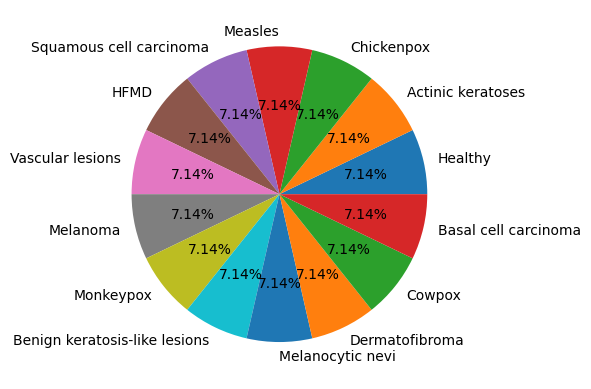

In [16]:
# Show the number of images to show there are no biases in the image set
pie = image_df_train['Label'].value_counts()
pie.plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.show()

## 🖥️ Display Images of the Dataset

Since we see that there is no data imbalance, the next step is to see whether our data has been loaded correctly or not in our data frame.

We can check that by plotting a sample of our images. To do that, we can use the `matplotlib` library.

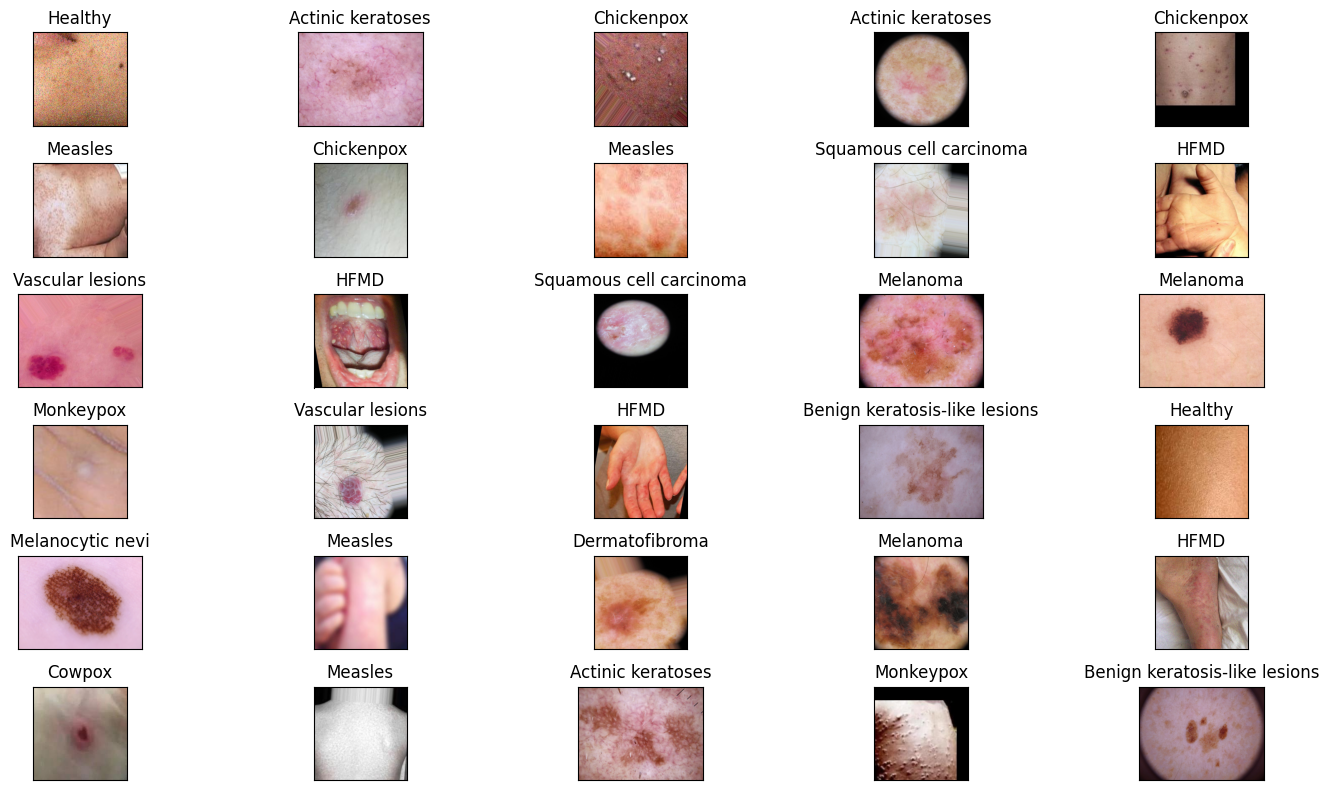

In [17]:
# 🖥️ Display Images of the Dataset

# Define figure and axes
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,8), subplot_kw={'xticks':[], 'yticks':[]})

# Display 30 images of the dataset
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df_train.Path[i], -1))
    ax.set_title(image_df_train.Label[i])
plt.tight_layout()
plt.show()

## 🗃️ Load the Test and Validation Data Frames

Next, load the test and validation data frames so that we can use them to create the models.

In [18]:
# 🗃️ Load the Test and Validation Data Frames

image_df_test = load_images_to_df(CNN_BALANCED_PATH, TEST_DIRECTORY, TEST_DATASET_SAMPLE_COUNT)
image_df_test.head(10)

,Path,Label
0,data/cnn_balanced/test/HFMD/HFMD_65_01_9.jpg,HFMD
1,data/cnn_balanced/test/Actinic keratoses/ISIC_...,Actinic keratoses
2,data/cnn_balanced/test/Squamous cell carcinoma...,Squamous cell carcinoma
3,data/cnn_balanced/test/HFMD/HFMD_66_02_8.jpg,HFMD
4,data/cnn_balanced/test/Basal cell carcinoma/IS...,Basal cell carcinoma
5,data/cnn_balanced/test/Chickenpox/CHP_54_02_OR...,Chickenpox
6,data/cnn_balanced/test/Melanocytic nevi/ISIC_0...,Melanocytic nevi
7,data/cnn_balanced/test/Measles/MSL_29_01_5_0_5...,Measles
8,data/cnn_balanced/test/Monkeypox/MKP_76_01_12.jpg,Monkeypox
9,data/cnn_balanced/test/HFMD/HFMD_122_01_13.jpg,HFMD


In [19]:
image_df_val = load_images_to_df(CNN_BALANCED_PATH, VALIDATION_DIRECTORY, VALIDATION_DATASET_SAMPLE_COUNT)
image_df_val.head(10)

,Path,Label
0,data/cnn_balanced/val/HFMD/HFMD_22_01_3.jpg,HFMD
1,data/cnn_balanced/val/Actinic keratoses/ISIC_0...,Actinic keratoses
2,data/cnn_balanced/val/Squamous cell carcinoma/...,Squamous cell carcinoma
3,data/cnn_balanced/val/HFMD/HFMD_66_02_9.jpg,HFMD
4,data/cnn_balanced/val/Basal cell carcinoma/ISI...,Basal cell carcinoma
5,data/cnn_balanced/val/Chickenpox/CHP_38_01_13_...,Chickenpox
6,data/cnn_balanced/val/Melanocytic nevi/ISIC_00...,Melanocytic nevi
7,data/cnn_balanced/val/Measles/MSL_05_01_11_0_5...,Measles
8,data/cnn_balanced/val/Monkeypox/MKP_06_01_5.jpg,Monkeypox
9,data/cnn_balanced/val/HFMD/HFMD_93_01_10.jpg,HFMD


## ✨ Create Model
The following functions are used to create the models and train them.

In [20]:
# Function to get generators per model
def get_generators_per_model(preprocess_fn):
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = preprocess_fn
    )

    validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = preprocess_fn
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = preprocess_fn
    )

    return (train_generator, validation_generator, test_generator)

In [21]:
# Function to load the dataset using the data frame
def create_dataset(generator, image_df, subset):
    images = generator.flow_from_dataframe(
        dataframe=image_df,
        x_col='Path', 
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=42)
    print(f"{subset} class indices: {images.class_indices}\n")
    return images

In [22]:
# Function to build model for hyperparameter tuning
def build_model_with_hp(hp, base_model, num_classes):
    # Start building the model
    inputs = base_model.input

    # Add first Dense layer with tunable units
    x = tf.keras.layers.Dense(units=hp.Int('dense_1_units', min_value=64, max_value=512, step=32), activation='relu')(base_model.output)
    # Add second Dense layer with fixed units
    x = tf.keras.layers.Dense(units=hp.Int('dense_2_units', min_value=64, max_value=512, step=32), activation='relu')(x)
    # Add dropout layer with tunable rate
    x = tf.keras.layers.Dropout(rate=hp.Choice('dropout_rate', values=[0.2,0.3,0.4]))(x)

    # Ad final Dense layer with the number of classes
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [23]:
# Function to perform hyperparameter tuning
def perform_hyperparameter_tuning(model_name, base_model_func, train_dataset, val_dataset, num_classes, max_epochs=100):
    print(f"Performing hyperparameter tuning for: {model_name}")
    
    base_model = base_model_func(weights='imagenet', pooling="avg", include_top=False, input_shape=(224, 224, 3))
    
    tuner = Hyperband(
        lambda hp: build_model_with_hp(hp, base_model, num_classes),
        objective='val_accuracy',
        max_epochs=max_epochs,
        factor=3,
        directory='hyperparameter_tuning',
        project_name=model_name
    )
    
    tuner.search(train_dataset, validation_data=val_dataset, epochs=max_epochs, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    print(f"Best hyperparameters for {model_name}:")
    print(f" - Units: {best_hps.get('units')}")
    print(f" - Dropout Rate: {best_hps.get('dropout_rate')}")
    print(f" - Learning Rate: {best_hps.get('learning_rate')}")
    
    return tuner

## 🛠️ Train and Evaluate Models

The following code explains how to train and evaluate the models.

In [24]:
# 🛠️ Train and Evaluate Models

# Function to train and evaluate models
def train_and_evaluate_model(model_name, base_model_func, train_dataset, val_dataset, test_dataset, model_dict, history_dict, test_accuracy_dict, num_classes, epochs=100):
    print(f"Training model: {model_name}")

    tuner = perform_hyperparameter_tuning(model_name, base_model_func, train_dataset, val_dataset, num_classes)
    
    # Get the best hyperparameters and build the model
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    # Load base model
    base_model = base_model_func(weights='imagenet', pooling="avg", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = build_model_with_hp(best_hps, base_model, num_classes)
    
    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
    
    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"{model_name} Test Accuracy: {test_accuracy:.2f}")

    # Store Results
    model_dict[model_name] = model
    history_dict[model_name] = history
    test_accuracy_dict[model_name] = test_accuracy

    # Save model
    model.save(f"{MODELS_PATH}/mpox_lesion_identification_{model_name}.h5")

In [25]:
# Generate the Classification Report for the Model
def generate_classification_report(model, train_dataset, test_dataset, test_df):
    y_pred = model.predict(test_dataset)
    y_pred = np.argmax(y_pred, axis=1)

    labels = (train_dataset.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    y_pred = [labels[k] for k in y_pred]

    y_test = list(test_df.Label)
    print(f"Classification Report for {model_name}\n")
    print(classification_report(y_test, y_pred))

In [26]:
# Generate the Confusion Matrix for the Model
def generate_confusion_matrix(model_name, model, train_dataset, test_dataset, test_df):
    y_pred = model.predict(test_dataset)
    y_pred = np.argmax(y_pred, axis=1)

    labels = (train_dataset.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    y_pred = [labels[k] for k in y_pred]

    y_test = list(test_df.Label)
    
    cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    plt.figure(figsize = (10,6))
    sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
    plt.title(f'Normalized Confusion Matrix For {model_name}')
    plt.show()

In [27]:
# Array for holding the results
model_dict = {}
history_dict = {}
test_accuracy_dict = {}

## ◉ VGG16

In [ ]:
# VGG16
model_name = "VGG16"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate VGG16
preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

Found 14000 validated image filenames belonging to 14 classes.
train class indices: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles': 8, 'Melanocytic nevi': 9, 'Melanoma': 10, 'Monkeypox': 11, 'Squamous cell carcinoma': 12, 'Vascular lesions': 13}

Found 2800 validated image filenames belonging to 14 classes.
val class indices: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles': 8, 'Melanocytic nevi': 9, 'Melanoma': 10, 'Monkeypox': 11, 'Squamous cell carcinoma': 12, 'Vascular lesions': 13}

Found 2800 validated image filenames belonging to 14 classes.
test class indices: {'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions': 2, 'Chickenpox': 3, 'Cowpox': 4, 'Dermatofibroma': 5, 'HFMD': 6, 'Healthy': 7, 'Measles'

2025-01-20 00:21:23.719133: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-01-20 00:21:23.719171: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-01-20 00:21:23.719681: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-01-20 00:21:23.719910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-20 00:21:23.719927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Reloading Tuner from hyperparameter_tuning/VGG16/tuner0.json
Best hyperparameters for VGG16:
 - Units: 352
 - Dropout Rate: 0.3
 - Learning Rate: 0.01
Epoch 1/100


2025-01-20 00:21:24.980920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


438/438 [==============================] - ETA: 0s - loss: 22.1749 - accuracy: 0.3025

2025-01-20 00:22:39.235986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


438/438 [==============================] - 89s 202ms/step - loss: 22.1749 - accuracy: 0.3025 - val_loss: 19.7408 - val_accuracy: 0.4314
Epoch 2/100
438/438 [==============================] - 88s 201ms/step - loss: 32.4093 - accuracy: 0.3601 - val_loss: 35.7011 - val_accuracy: 0.4146
Epoch 3/100
438/438 [==============================] - 89s 203ms/step - loss: 65.6807 - accuracy: 0.3666 - val_loss: 66.5173 - val_accuracy: 0.3793
Epoch 4/100
438/438 [==============================] - 89s 202ms/step - loss: 80.6191 - accuracy: 0.3999 - val_loss: 88.6430 - val_accuracy: 0.4225
Epoch 5/100
438/438 [==============================] - ETA: 0s - loss: 110.9630 - accuracy: 0.4017

In [ ]:
# Predict and generate classification report for VGG16
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for VGG16
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

## ◉ VGG19

In [ ]:
# VGG19
model_name = "VGG19"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate VGG19

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for VGG19
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for VGG19
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

## ◉ MobileNetV2

In [ ]:
# MobileNetV2
model_name = "MobileNetV2"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate MobileNetV2

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for MobileNetV2
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for MobileNetV2
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

## ◉ ResNet50V2

In [ ]:
# ResNet50V2
model_name = "ResNet50V2"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate ResNet50V2

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for ResNet50V2
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for ResNet50V2
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

## ◉ InceptionResNetV2

In [ ]:
# InceptionResNetV2
model_name = "InceptionResNetV2"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate InceptionResNetV2

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for InceptionResNetV2
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for InceptionResNetV2
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

## ◉ Xception

In [ ]:
# Xception
model_name = "Xception"
base_model_func = MODELS_TO_TEST[model_name]

# Evaluate Xception

preprocess_fn = PREPROCESSING_FUNCTIONS[model_name]
    
(train_generator, validation_generator, test_generator) = get_generators_per_model(preprocess_fn)
    
train_dataset = create_dataset(train_generator, image_df_train, TRAIN_DIRECTORY)
val_dataset = create_dataset(validation_generator, image_df_val, VALIDATION_DIRECTORY)
test_dataset = create_dataset(test_generator, image_df_test, TEST_DIRECTORY)

train_and_evaluate_model(
    model_name,
    base_model_func,
    train_dataset,
    val_dataset,
    test_dataset,
    model_dict,
    history_dict,
    test_accuracy_dict,
    num_classes=len(image_df_train['Label'].unique()),
    epochs=100
)

In [ ]:
# Predict and generate classification report for Xception
model = model_dict[model_name]
generate_classification_report(model, train_dataset, test_dataset, image_df_test)

In [ ]:
# Get confusion matrix for Xception
generate_confusion_matrix(model_name, model, train_dataset, test_dataset, image_df_test)

## 📈 Plot the Training and Validation Accuracies

Plot the training and validation accuracies using the dictionaries.

In [ ]:
# Function to plot training and validation accuracies
def plot_training_history(history_dict):
    fig, axes = plt.subplots(len(history_dict), 2, figsize=(12, 6 * len(history_dict)))
    fig.suptitle("Training and Validation Metrics for All Models", fontsize=16)
    
    for idx, (model_name, history) in enumerate(history_dict.items()):
        # Extract metrics
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(acc) + 1)
        
        # Plot accuracy
        ax_acc = axes[idx, 0] if len(history_dict) > 1 else axes[0]
        ax_acc.plot(epochs, acc, 'b-', label='Training Accuracy')
        ax_acc.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
        ax_acc.set_title(f'{model_name} - Accuracy')
        ax_acc.set_xlabel('Epochs')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.legend()
        
        # Plot loss
        ax_loss = axes[idx, 1] if len(history_dict) > 1 else axes[1]
        ax_loss.plot(epochs, loss, 'b-', label='Training Loss')
        ax_loss.plot(epochs, val_loss, 'r-', label='Validation Loss')
        ax_loss.set_title(f'{model_name} - Loss')
        ax_loss.set_xlabel('Epochs')
        ax_loss.set_ylabel('Loss')
        ax_loss.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for title
    plt.show()

In [ ]:
# Call the function to plot
plot_training_history(history_dict)